In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
california = fetch_california_housing()

In [3]:
x = california.data
y = california.target

In [4]:
x.shape, y.shape

((20640, 8), (20640,))

## 분리 및 전처리 x

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [9]:
# 모델 초기화
keras.backend.clear_session()

# 모델 생성
model = keras.models.Sequential()

# 레이어 추가
model.add(keras.layers.Input(shape=(8,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))

# 모델 컴파일
model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모델 훈련
model.fit(x, y, epochs=10)

Epoch 1/10
645/645 [==============================] - 1s 2ms/step - loss: 250.6972
Epoch 2/10
645/645 [==============================] - 1s 2ms/step - loss: 1.7754
Epoch 3/10
645/645 [==============================] - 1s 2ms/step - loss: 1.4655
Epoch 4/10
645/645 [==============================] - 1s 2ms/step - loss: 1.4109
Epoch 5/10
645/645 [==============================] - 1s 2ms/step - loss: 1.1956
Epoch 6/10
645/645 [==============================] - 1s 2ms/step - loss: 2.3585
Epoch 7/10
645/645 [==============================] - 1s 2ms/step - loss: 2.8820
Epoch 8/10
645/645 [==============================] - 1s 2ms/step - loss: 29.4059
Epoch 9/10
645/645 [==============================] - 1s 2ms/step - loss: 0.9280
Epoch 10/10
645/645 [==============================] - 1s 2ms/step - loss: 0.7948


In [11]:
# 모델 예측
y_pred = model.predict(x)
print(y_pred[:5].reshape(-1))
print(y[:5])

[3.7815022 2.2508411 3.738875  3.0698328 2.436617 ]
[4.526 3.585 3.521 3.413 3.422]


## train, test 분리 후 전처리

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2022, test_size=0.2)

In [39]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [40]:
# # x : 스케일링
# max_num = x_train.max()
# min_num = x_train.min()

# x_train = (x_train - min_num) / (max_num - min_num)
# x_test = (x_test - min_num) / (max_num - min_num)

# (x_train.min(), x_train.max()), (x_test.min(), x_test.max())

In [41]:
x_train.shape, y_train.shape

((16512, 8), (16512,))

In [42]:
keras.backend.clear_session()

input_layer = keras.layers.Input(shape=(8,))
hiden_layer = keras.layers.Dense(32)(input_layer)
hiden_layer = keras.layers.Dense(32)(hiden_layer)
hiden_layer = keras.layers.Dense(32)(hiden_layer)
output_layer = keras.layers.Dense(1)(hiden_layer)

model = keras.models.Model(input_layer, output_layer)

model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adam(learning_rate=0.001))

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [43]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True, verbose=1)

hist = model.fit(x_train, y_train, epochs=50, validation_split=0.2, callbacks=es, verbose=1, batch_size=16)

Epoch 1/50
826/826 [==============================] - 2s 2ms/step - loss: 509.4885 - val_loss: 1.6927
Epoch 2/50
826/826 [==============================] - 1s 2ms/step - loss: 39.8299 - val_loss: 9.6992
Epoch 3/50
826/826 [==============================] - 1s 2ms/step - loss: 120.1347 - val_loss: 44.2716
Epoch 4/50
826/826 [==============================] - 2s 2ms/step - loss: 37.6558 - val_loss: 0.8026
Epoch 5/50
826/826 [==============================] - 2s 2ms/step - loss: 92.6419 - val_loss: 0.8674
Epoch 6/50
826/826 [==============================] - 2s 2ms/step - loss: 667.0056 - val_loss: 1.1543
Epoch 7/50
826/826 [==============================] - 2s 2ms/step - loss: 1.1187 - val_loss: 1.0614
Epoch 8/50
826/826 [==============================] - 2s 2ms/step - loss: 1.0921 - val_loss: 0.9257
Epoch 9/50
826/826 [==============================] - 2s 2ms/step - loss: 1.0848 - val_loss: 0.8604
Epoch 9: early stopping


In [44]:
y_pred = model.predict(x_test)
print(y_pred[:5].reshape(-1))
print(y[:5])

[3.2760293 1.9354227 1.7453287 1.4282663 2.7116601]
[4.526 3.585 3.521 3.413 3.422]


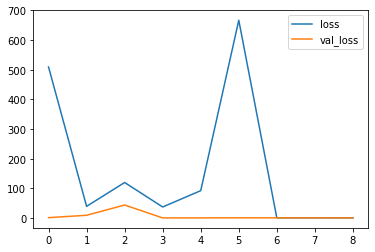

In [45]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')

plt.legend()

plt.show()